In [1]:
import pandas as pd
import glob 
import os
import numpy as np

In [2]:
files = glob.glob(os.path.join("./individual_book_train", "*.csv"))
time_ids = pd.read_csv(files[0]).time_id.unique()
len(time_ids)

3830

In [3]:
stocks = pd.read_csv("all_times.csv")
stocks

,stock_id,beta,dom,spread,time_id
0,0,1.208072,313.922175,0.000865,5
1,0,0.199712,623.322233,0.003214,32033
2,0,0.411849,435.911302,0.000413,840
3,0,1.108232,394.679405,0.000667,2568
4,0,2.101981,490.781742,0.000891,3378
...,...,...,...,...,...
140107,126,1.552018,467.701373,0.000614,1890
140108,126,2.044654,399.923707,0.000605,411
140109,126,6.142178,437.003763,0.001040,4266
140110,126,2.721219,368.014333,0.000626,4388


In [4]:
len(stocks.time_id.unique())

1251

In [5]:
len(stocks.time_id.unique()) / len(time_ids)

0.32663185378590076

In [6]:
 len(time_ids) - len(stocks.time_id.unique())

2579

array([[<AxesSubplot:title={'center':'mean_beta'}>,
        <AxesSubplot:title={'center':'mad_beta'}>],
       [<AxesSubplot:title={'center':'mean_dom'}>,
        <AxesSubplot:title={'center':'mad_dom'}>],
       [<AxesSubplot:title={'center':'mean_spread'}>,
        <AxesSubplot:title={'center':'mad_spread'}>]], dtype=object)

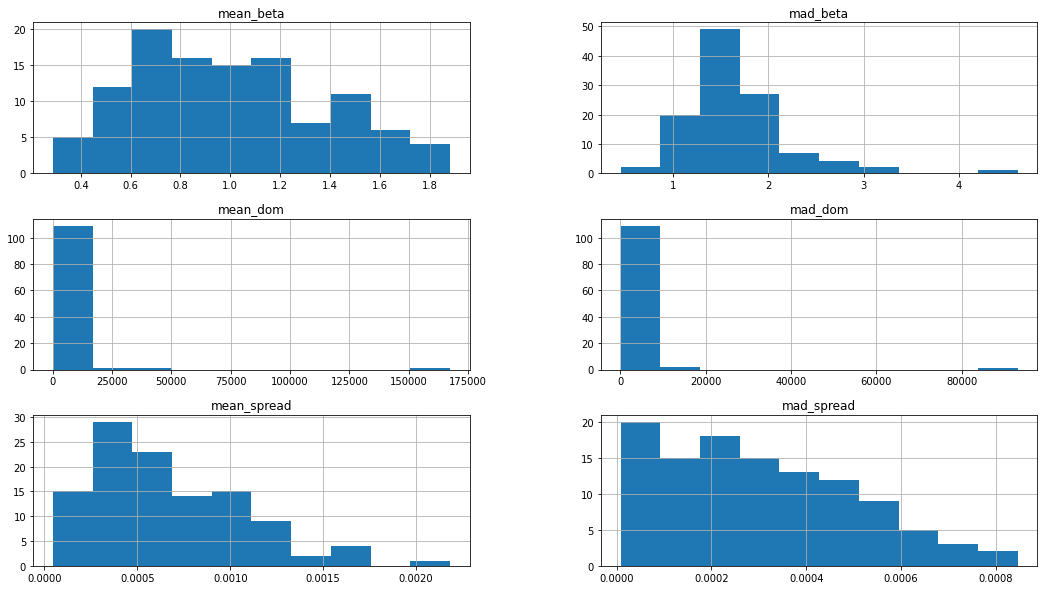

In [7]:
# storing averaged beta, dom & spread in dataframe for each
stock_final = pd.DataFrame({
    'stock_id': stocks['stock_id'].unique(),
    'mean_beta': stocks.groupby(['stock_id'])['beta'].mean(),
    #'sd_beta': stocks.groupby(['stock_id'])['beta'].std(),
    #'var_beta': stocks.groupby(['stock_id'])['beta'].var(),
    'mad_beta': stocks.groupby(['stock_id'])['beta'].mad(),

    'mean_dom': stocks.groupby(['stock_id'])['dom'].mean(),
    #'sd_dom': stocks.groupby(['stock_id'])['dom'].std(),
    #'var_dom': stocks.groupby(['stock_id'])['dom'].var(),
    'mad_dom': stocks.groupby(['stock_id'])['dom'].mad(),

    'mean_spread': stocks.groupby(['stock_id'])['spread'].mean(),
    #'sd_spread': stocks.groupby(['stock_id'])['spread'].std(),
    #'var_spread': stocks.groupby(['stock_id'])['spread'].var(),
    'mad_spread': stocks.groupby(['stock_id'])['spread'].mad()
})

s = stock_final.reset_index(drop=True)
s.iloc[:,1:].hist(figsize = (18,10))

In [8]:
#s[s['stock_id'] == 31]

#s = s.drop(index=28)

array([[<AxesSubplot:title={'center':'mean_beta'}>,
        <AxesSubplot:title={'center':'mad_beta'}>,
        <AxesSubplot:title={'center':'mean_dom'}>],
       [<AxesSubplot:title={'center':'mad_dom'}>,
        <AxesSubplot:title={'center':'mean_spread'}>,
        <AxesSubplot:title={'center':'mad_spread'}>],
       [<AxesSubplot:title={'center':'mean_ldom'}>,
        <AxesSubplot:title={'center':'mad_ldom'}>, <AxesSubplot:>]],
      dtype=object)

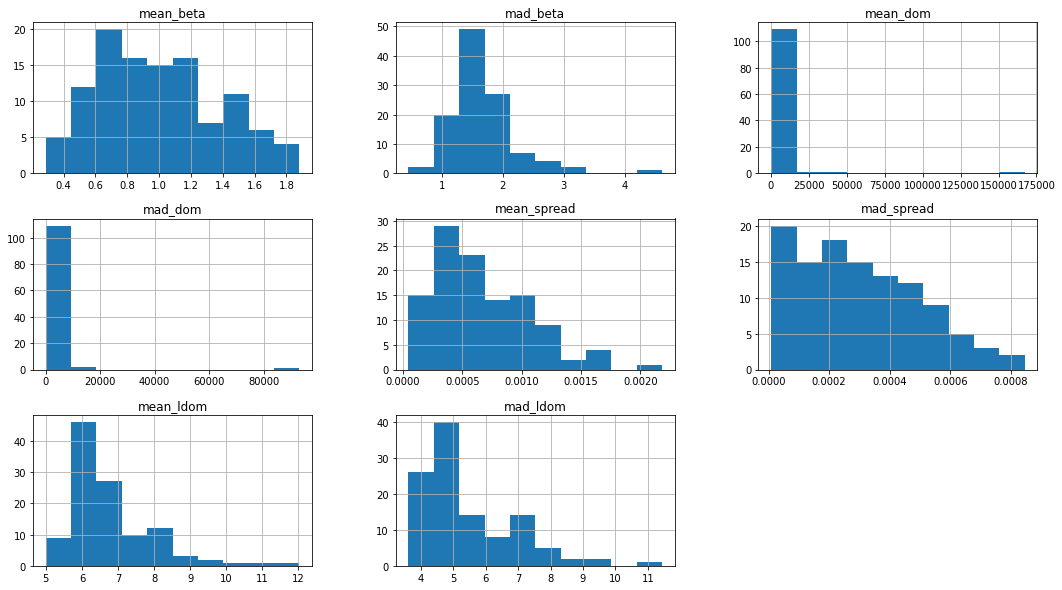

In [9]:
import numpy as np

s['mean_ldom'] = np.log(s['mean_dom'])
#s['sd_ldom'] = np.log(s['sd_dom'])
#s['var_ldom'] = np.log(s['var_dom'])
s['mad_ldom'] = np.log(s['mad_dom'])

s.iloc[:,1:].hist(figsize = (18,10))

In [10]:
df = pd.concat([s.iloc[:,1:2], s.iloc[:,5:6], s.iloc[:,8:9]], axis=1)
df 

,mean_beta,mean_spread,mad_ldom
0,0.989819,0.001032,4.347738
1,1.507280,0.000724,4.871923
2,0.288285,0.000260,5.417882
3,1.792897,0.001081,4.926690
4,0.675763,0.000916,4.283513
...,...,...,...
107,1.416887,0.000648,4.628161
108,0.846961,0.000235,6.449690
109,1.638122,0.000206,7.592842
110,0.533020,0.000233,7.086424


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_beta,112.0,1.000000,0.378224,0.288285,0.716986,0.954049,1.241049,1.881717
mean_spread,112.0,0.000665,0.000401,0.000046,0.000357,0.000589,0.000939,0.002182
mad_ldom,112.0,5.488189,1.434358,3.614743,4.431647,4.995590,6.251091,11.441481


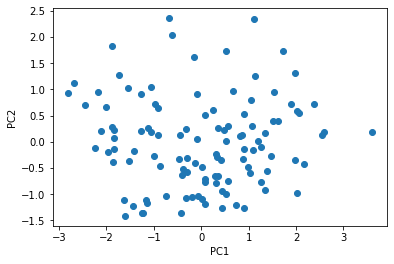

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_norm = scaler.fit_transform(df)


# PCA with 2 components for graphing
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_norm)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

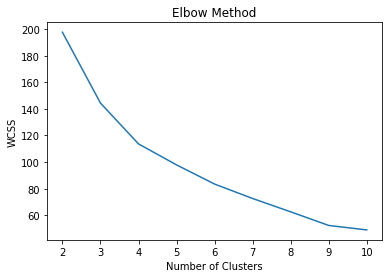

In [13]:
from sklearn.cluster import KMeans

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Estimated number of clusters: 4


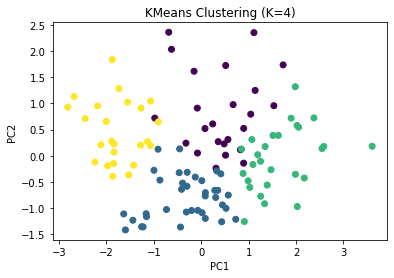

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_norm)
kmeans.labels_

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering (K={num_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

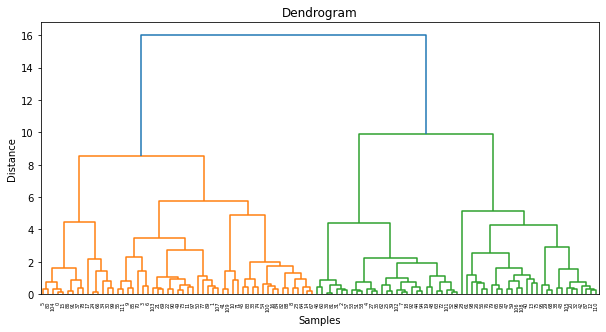

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(X_norm, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Estimated number of clusters: 4


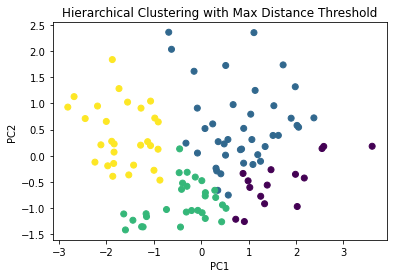

In [16]:
# Estimate number of clusters
max_d = 7 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Max Distance Threshold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

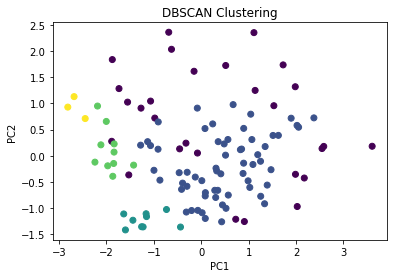

In [17]:
from sklearn.cluster import DBSCAN

# Density-based clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels = dbscan.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

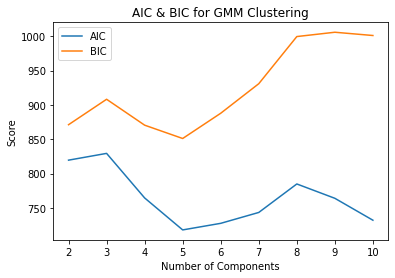

In [18]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_norm) for n in n_components]
plt.plot(n_components, [m.aic(X_norm) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X_norm) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

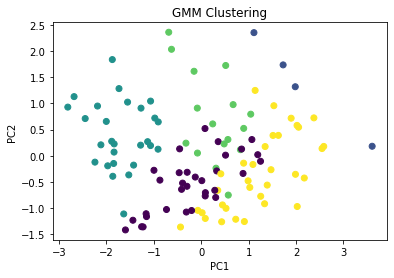

In [19]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('GMM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

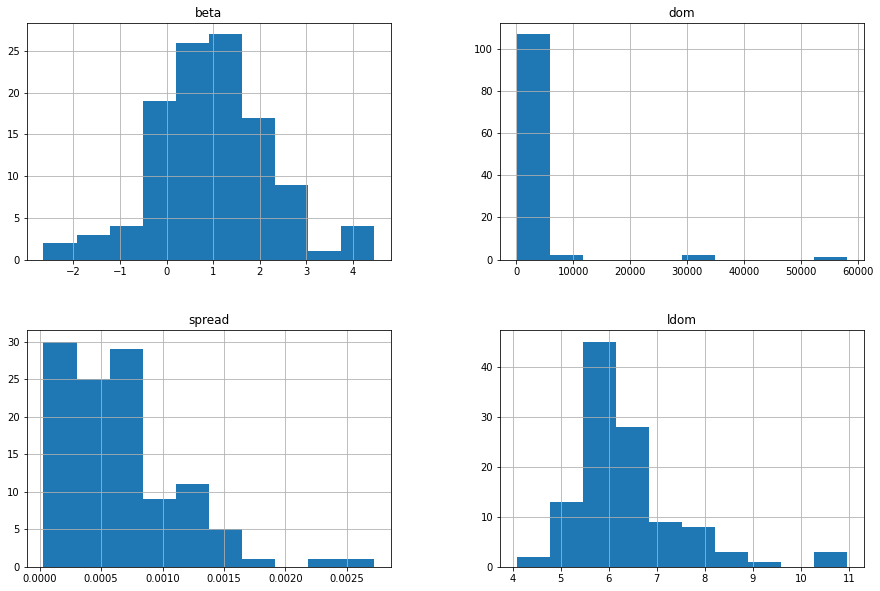

In [20]:
d = pd.read_csv("time/time_5.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

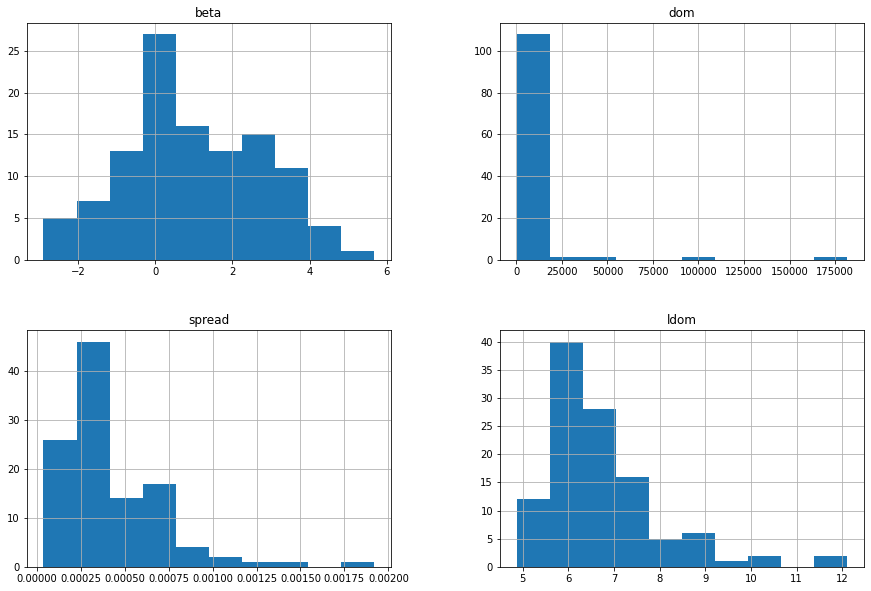

In [21]:
d = pd.read_csv("time/time_31034.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

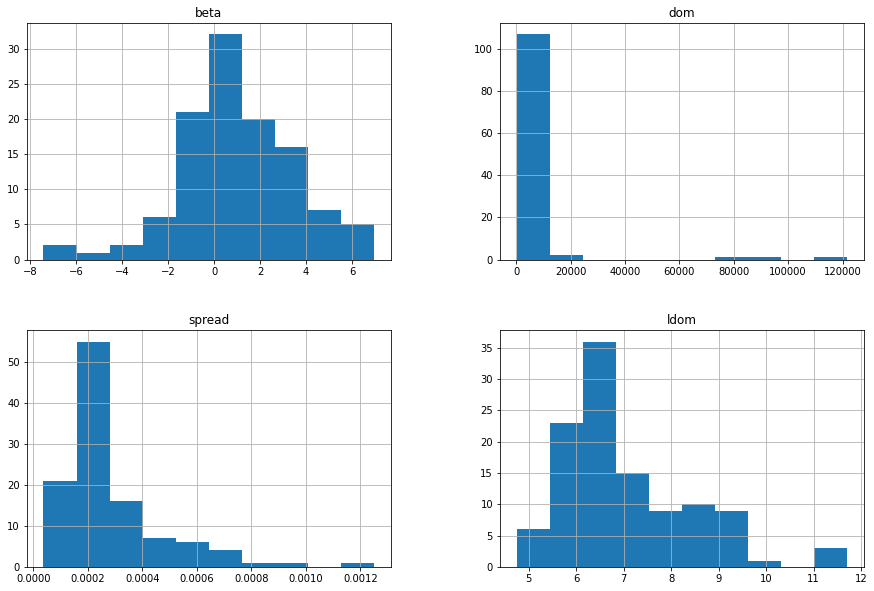

In [22]:
d = pd.read_csv("time/time_31071.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))